# PCA on Sales Superstore

In [1]:
import pandas as pd
import numpy as np
from sklearn import decomposition

sales = pd.read_csv('sales_superstore.csv', encoding='iso-8859-1')

pca = decomposition.PCA(n_components = 3)

pca.fit(sales.as_matrix())

# Data Slicing

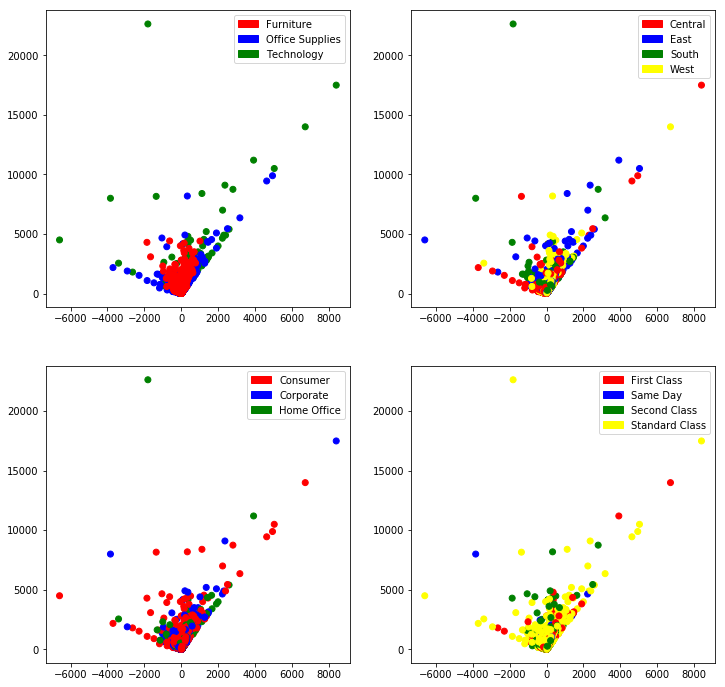

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D

color = ['red', 'blue', 'green', 'yellow']
plt.figure(figsize=(12, 12))
sales_x = sales[['Profit', 'Sales']].as_matrix()
fig_seq = 0
for column in ['Category', 'Region', 'Segment', 'Ship Mode']:
    unique = np.unique(sales[column])
    cmap = {}
    patch = []
    for i in range(len(unique)):
        cmap[unique[i]] = color[i]
        patch.append(mpatches.Patch(color=color[i], label=unique[i]))
    label = [cmap[i] for i in sales[column]]
    fig_seq += 1
    plt.subplot(2, 2, fig_seq)
    plt.scatter(sales_x[:,0], sales_x[:,1], c=label)
    plt.legend(handles=patch)

plt.show()

# Nominal and Ordinal Values

In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv('student-mat.csv', sep=';')

data_with_dummies = pd.get_dummies(data)
data_with_dummies.shape
list(data_with_dummies)

null_value = [
    '?',
    'no',
    'none',
    'other',
    'unknown/invalid']

def convert_nominal_column(col):
    distinct_value = list(set(col.values))
    value_to_be_mapped = []
    null_value_count = 0
    for v in distinct_value:
        if str(v).lower() in null_value:
            null_value_count += 1
        else:
            value_to_be_mapped.append(v)
    if null_value_count > 1:
        print('more than 1 null value exists in column', col.name, ', please revise your code')
        return None, None
    if len(value_to_be_mapped) == 0:
        print('no value to be converted for column', col.name, ', skip')
        return None, None
    if len(value_to_be_mapped) > 50:
        print('too many columns if column', col.name, "were to converted, let's ignore for now")
        return None, None
    mat = np.zeros((len(col), len(value_to_be_mapped)))
    for j in range(len(value_to_be_mapped)):
        mat[:,j] = np.array(col == value_to_be_mapped[j], dtype = 'int')
    header = [col.name + '_=_' + str(i) for i in value_to_be_mapped]
    return header, mat

In [4]:
numerical_column = [
    'age',
    'Medu',
    'Fedu',
    'traveltime',
    'studytime',
    'failures',
    'famrel',
    'freetime',
    'goout',
    'Dalc',
    'Walc',
    'health',
    'absences']

response_column = [
    'G1',
    'G2',
    'G3']

header_X1 = []
num_row = len(data)
X1 = np.zeros((num_row,0))

for col in data.columns:
    if col in response_column:
        continue
    elif col in numerical_column:
        header_X1.append(col)
        X1 = np.hstack((X1, np.array(data[col]).reshape(num_row,1)))
    else:
        header, mat = convert_nominal_column(data[col])
        if header is not None:
            header_X1.extend(header)
            X1 = np.hstack((X1, mat))

print('the shape of matrix X1:', X1.shape)

the shape of matrix X1: (395, 44)


In [5]:
ordinal_column = [
    'Medu',
    'Fedu',
    'famrel',
    'freetime',
    'goout',
    'Dalc',
    'Walc',
    'health']

def convert_ordinal_column(col):
    distinct_value = list(set(col.values))
    if len(distinct_value) == 1:
        print('same value in column', col.name, ', skip')
        return None, None
    value_to_be_mapped = distinct_value[1:]
    if len(value_to_be_mapped) > 50:
        print('too many columns if column', col.name, "were to converted, let's ignore for now")
        return None, None
    mat = np.zeros((len(col), len(value_to_be_mapped)))
    for j in range(len(value_to_be_mapped)):
        mat[:,j] = np.array(col >= value_to_be_mapped[j], dtype = 'int')
    header = [col.name + '_=_' + str(i) for i in value_to_be_mapped]
    return header, mat

In [6]:
header_X2 = []
X2 = np.zeros((num_row,0))

for col in data.columns:
    if col in response_column:
        continue
    elif col in numerical_column:
        if col in ordinal_column:
            header, mat = convert_ordinal_column(data[col])
            if header is not None:
                header_X2.extend(header)
                X2 = np.hstack((X2, mat))
        else:
            header_X2.append(col)
            X2 = np.hstack((X2, np.array(data[col]).reshape(num_row,1)))
    else:
        header, mat = convert_nominal_column(data[col])
        if header is not None:
            header_X2.extend(header)
            X2 = np.hstack((X2, mat))

print('the shape of matrix X2:', X2.shape)

the shape of matrix X2: (395, 68)


# PCA on diabetes data

In [7]:
import numpy as np
from sklearn import datasets, decomposition
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

diabetes = datasets.load_diabetes()
pca = decomposition.PCA(n_components=3)
pca.fit(diabetes.data)
pca.mean_
pca.components_
pca.explained_variance_ratio_
xtr1 = pca.transform(diabetes.data)
xtr2 = pca.fit_transform(diabetes.data)
diff = xtr1 - xtr2
[np.min(diff),np.max(diff)]
x_proj = pca.inverse_transform(xtr1)
sum(sum((diabetes.data - pca.mean_)**2))
sum(sum((diabetes.data - x_proj)**2))
sum(pca.explained_variance_ratio_)

0.6722494722420754

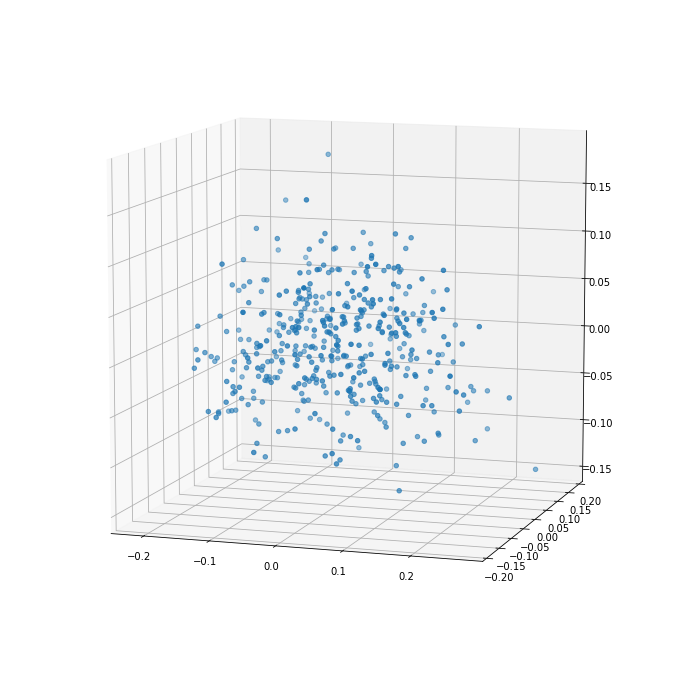

In [8]:
plt.figure(figsize=(12, 12))
fig = plt.subplot(1, 1, 1, projection='3d')
fig.scatter(xtr2[:,0], xtr2[:,1], xtr2[:,2])
fig.view_init(10, -72)
plt.show()

# Apply PCA on Sales Superstore

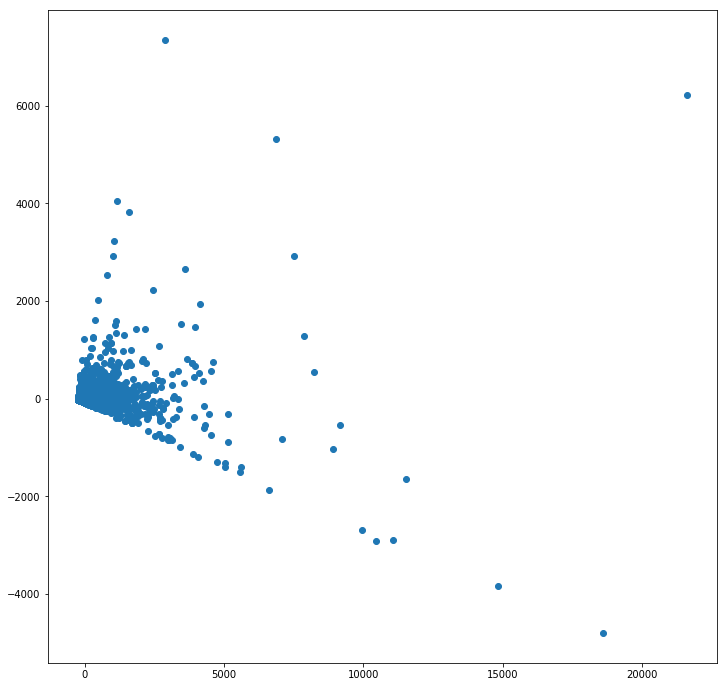

In [9]:
import pandas as pd
import numpy as np
from sklearn import decomposition
import matplotlib.pyplot as plt

sales = pd.read_csv('sales_superstore.csv', encoding='iso-8859-1')

sales_x = sales[['Discount', 'Number of Records', 'Profit', 'Profit Ratio', 'Quantity', 'Sales']].as_matrix()

pca = decomposition.PCA(n_components = 2)

sales_transformed = pca.fit_transform(sales_x)

plt.figure(figsize=(12, 12))
plt.scatter(sales_transformed[:,0], sales_transformed[:,1])
plt.show()

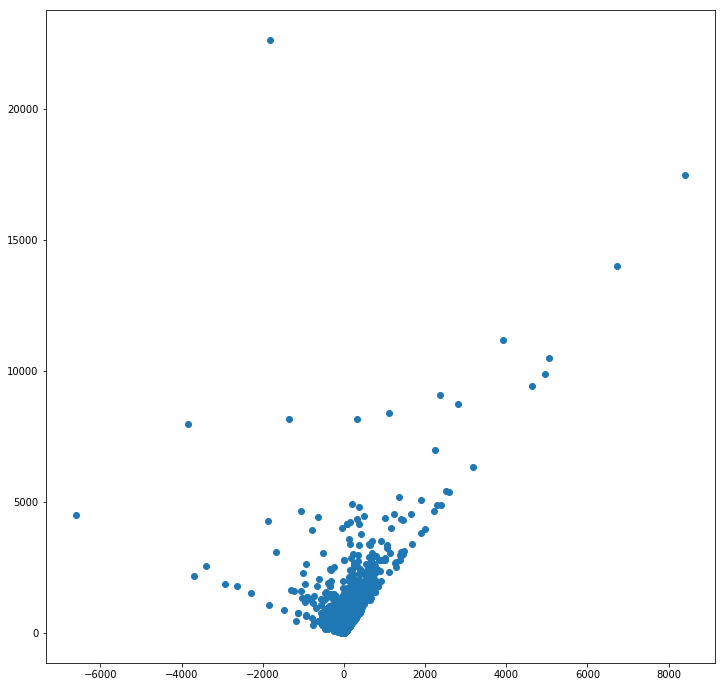

In [10]:
sales_x2 = sales[['Profit', 'Sales']].as_matrix()
plt.figure(figsize=(12, 12))
plt.scatter(sales_x2[:,0], sales_x2[:,1])
plt.show()

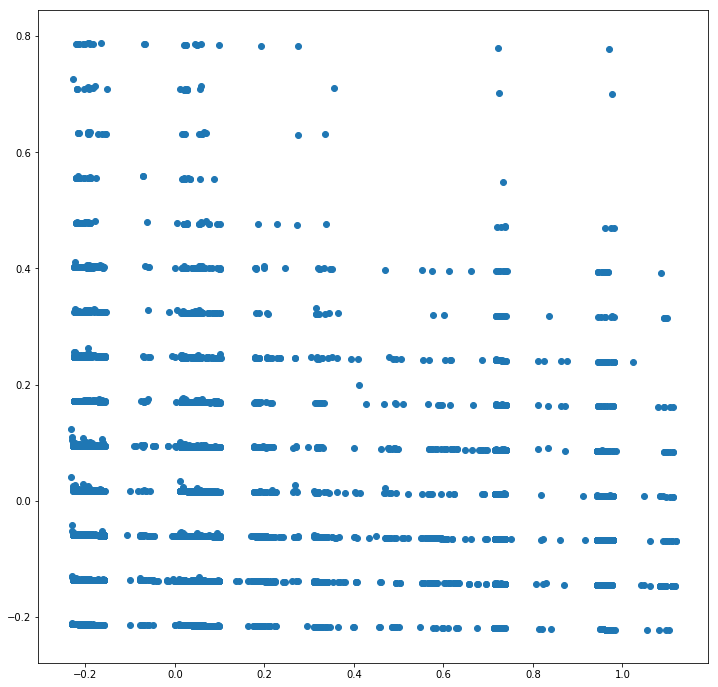

In [11]:
sales_x = sales[['Discount', 'Profit', 'Profit Ratio', 'Quantity', 'Sales']].as_matrix()

sales_x3 = (sales_x - np.min(sales_x, axis=0)) / (np.max(sales_x, axis=0) - np.min(sales_x, axis=0))

sales_transformed = pca.fit_transform(sales_x3)

plt.figure(figsize=(12, 12))
plt.scatter(sales_transformed[:,0], sales_transformed[:,1])
plt.show()

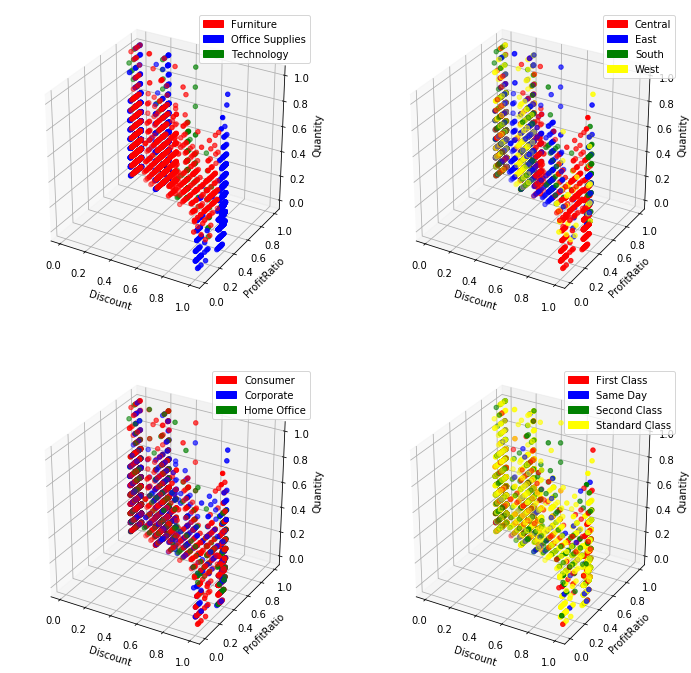

In [12]:
sales_x = sales[['Discount', 'Profit Ratio', 'Quantity']].as_matrix()

sales_x4 = (sales_x - np.min(sales_x, axis=0)) / (np.max(sales_x, axis=0) - np.min(sales_x, axis=0))

color = ['red', 'blue', 'green', 'yellow']
plt.figure(figsize=(12, 12))
fig_seq = 0
for column in ['Category', 'Region', 'Segment', 'Ship Mode']:
    unique = np.unique(sales[column])
    cmap = {}
    patch = []
    for i in range(len(unique)):
        cmap[unique[i]] = color[i]
        patch.append(mpatches.Patch(color=color[i], label=unique[i]))
    label = [cmap[i] for i in sales[column]]
    fig_seq += 1
    fig = plt.subplot(2, 2, fig_seq, projection='3d')
    fig.set_xlabel('Discount')
    fig.set_ylabel('ProfitRatio')
    fig.set_zlabel('Quantity')
    fig.scatter(sales_x4[:,0], sales_x4[:,1], sales_x4[:,2], c=label)
    fig.legend(handles=patch)

plt.show()

# Numerical Value Normalization

In [13]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr

msft = pdr.DataReader('MSFT', 'iex', start = '2017-05-01', end = '2018-04-30')
msft = msft.rename(index = {i: pd.datetime(int(i[:4]), int(i[5:7]), int(i[8:10])) for i in msft.index.values.tolist()})

x = np.column_stack((msft.shift(1)['close'],
                      msft.shift(2)['close'],
                      msft.shift(3)['close'],
                      msft.shift(4)['close'],
                      msft.shift(5)['close'],
                      msft.shift(1)['volume'],
                      msft.shift(2)['volume'],
                      msft.shift(3)['volume'],
                      msft.shift(4)['volume'],
                      msft.shift(5)['volume']))[5:]
y = msft['close'][5:]

2y


In [14]:
from sklearn import linear_model, model_selection

x_train = [0] * 3
x_test = [0] * 3
x_train[0], x_test[0], y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.2, random_state = 2018)

regr = linear_model.LinearRegression()
regr.fit(x_train[0], y_train)
regr.score(x_test[0], y_test)

0.9826979408643642

In [15]:
from sklearn import preprocessing, metrics

standard_scaler = preprocessing.StandardScaler()
min_max_scaler = preprocessing.MinMaxScaler()
x_train[1] = standard_scaler.fit_transform(x_train[0])
x_test[1] = standard_scaler.transform(x_test[0])
x_train[2] = min_max_scaler.fit_transform(x_train[0])
x_test[2] = min_max_scaler.transform(x_test[0])

ridge = linear_model.Ridge()
lasso = linear_model.Lasso()

for i in (1, 2):
    regr.fit(x_train[i], y_train)
    regr.score(x_test[i], y_test)
    
    ridge.fit(x_train[i], y_train)
    ridge.score(x_test[i], y_test)
    
    lasso.fit(x_train[i], y_train)
    lasso.score(x_test[i], y_test)

In [16]:
score = [{} for i in range(3)]
for alpha in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    ridge = linear_model.Ridge(alpha = alpha)
    for i in range(3):
        ridge.fit(x_train[i], y_train)
        score[i][alpha] = ridge.score(x_test[i], y_test)

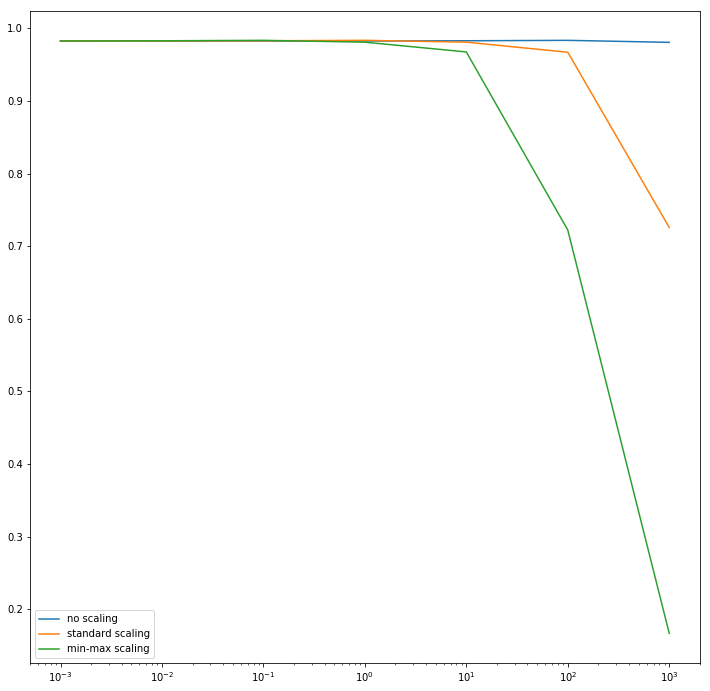

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 12))
plt.xscale('log')
label = ['no scaling', 'standard scaling', 'min-max scaling']
for i in range(3):
    plt.plot(score[i].keys(), score[i].values(), label = label[i])
plt.legend()
plt.show()

# MDS example

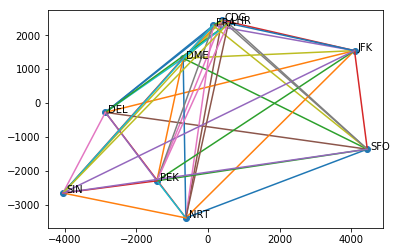

In [18]:
import numpy as np
from sklearn import manifold
import matplotlib.pyplot as plt
file = open('gcdist.tsv', 'r')
airport = file.readline()[:-1].split('\t')
len_airport = len(airport)
dissim = []
for i in range(len_airport):
    vstr = file.readline()[:-1].split('\t')
    vfloat = [float(j) for j in vstr]
    dissim.append(vfloat)

dissim = np.array(dissim)
mds = manifold.MDS(n_components=2, dissimilarity='precomputed')
x = mds.fit_transform(dissim)
plt.scatter(x[:,0], x[:,1])
offset = (np.max(x,axis=0) - np.min(x,axis=0)) / 100
for i in range(len_airport):
    plt.text(x[i,0] + offset[0], x[i,1], airport[i])

for i in range(len_airport):
    for j in range(i+1, len_airport):
        plt.plot((x[i,0],x[j,0]), (x[i,1],x[j,1]))

plt.show()

# K-Means algorithm visualization

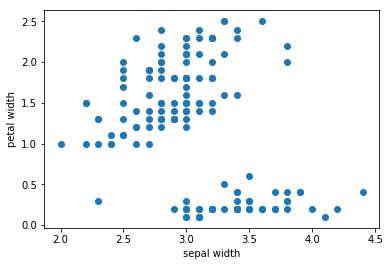

In [19]:
import numpy as np
from sklearn import datasets, cluster
import matplotlib.pyplot as plt

iris = datasets.load_iris()
x = iris.data[:,[1,3]]
plt.scatter(x[:,0], x[:,1])
plt.xlabel('sepal width')
plt.ylabel('petal width')
plt.show()

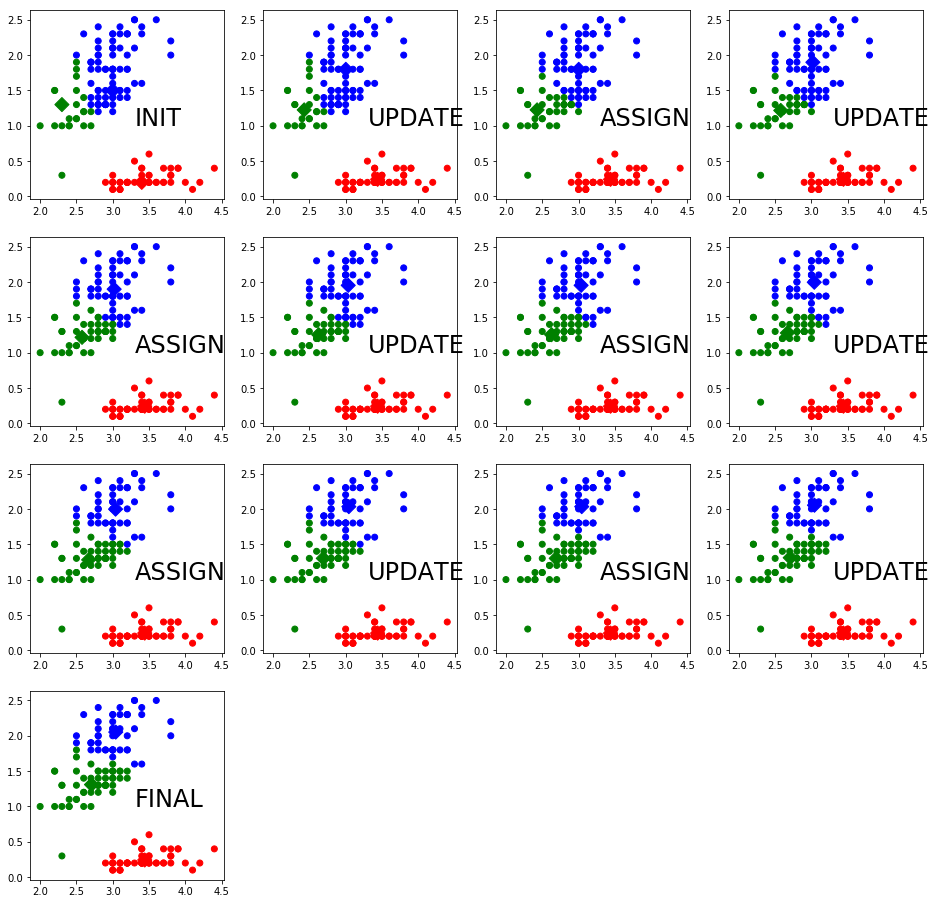

In [20]:
np.random.seed(2018)
center = x[np.random.choice(len(x), 3, replace=False),:]

dist = np.zeros((len(x),len(center)))
for i in range(len(x)):
    for j in range(len(center)):
        dist[i][j] = np.sum((x[i,:] - center[j,:]) ** 2)

assignment = np.argmin(dist, axis=1)
color_map = ['red', 'green', 'blue']
plt.figure(figsize=(16, 16))
fig_seq = 1
fig = plt.subplot(4, 4, fig_seq)
fig.scatter(x[:,0],x[:,1],c=[color_map[i] for i in assignment])
fig.scatter(center[:,0], center[:,1], c=color_map, marker='D', s=100)
fig.text(3.3, 1.0, 'INIT', fontsize=24)

converged = False
while not converged:
    center.fill(0)
    count = np.zeros((len(center)))
    for i in range(len(x)):
        center[assignment[i],:] += x[i,:]
        count[assignment[i]] += 1
    
    for j in range(len(center)):
        center[j,:] /= count[j]
    
    fig_seq += 1
    fig = plt.subplot(4, 4, fig_seq)
    fig.scatter(x[:,0], x[:,1], c = [color_map[i] for i in assignment])
    fig.scatter(center[:,0], center[:,1], c = color_map, marker='D', s=100)
    fig.text(3.3, 1.0, 'UPDATE', fontsize=24)
    
    for i in range(len(x)):
        for j in range(len(center)):
            dist[i][j] = np.sum((x[i,:] - center[j,:]) ** 2)
    
    assignment_old = assignment
    assignment = np.argmin(dist, axis=1)
    
    fig_seq += 1
    fig = plt.subplot(4, 4, fig_seq)
    fig.scatter(x[:,0], x[:,1], c = [color_map[i] for i in assignment])
    fig.scatter(center[:,0], center[:,1], c=color_map, marker='D', s=100)
    
    converged = np.array_equal(assignment, assignment_old)
    if converged:
        fig.text(3.3, 1.0, 'FINAL', fontsize=24)
    else:
        fig.text(3.3, 1.0, 'ASSIGN', fontsize=24)

plt.show()

# iris KMeans

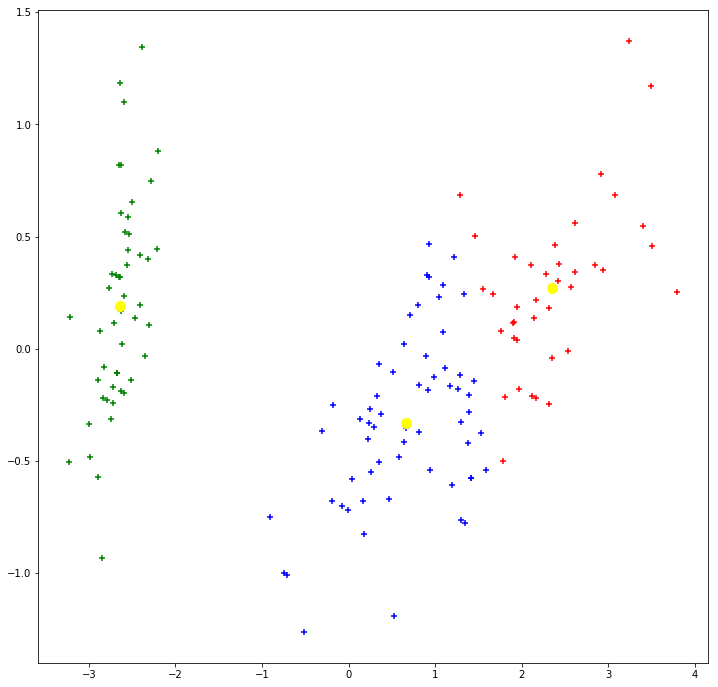

In [21]:
import numpy as np
from sklearn import datasets, decomposition, cluster
import matplotlib.pyplot as plt

iris = datasets.load_iris()
x = iris.data

pca = decomposition.PCA(n_components = 2)
xr = pca.fit_transform(x)

kmeans = cluster.KMeans(n_clusters=3, init='k-means++', random_state=2018)
kmeans.fit(xr)
label = kmeans.labels_
color = ['red', 'green', 'blue']

plt.figure(figsize=(12, 12))
plt.scatter(xr[:,0], xr[:,1], c=[color[i] for i in label], marker='+')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='yellow', s=100)
plt.show()

# faces PCA

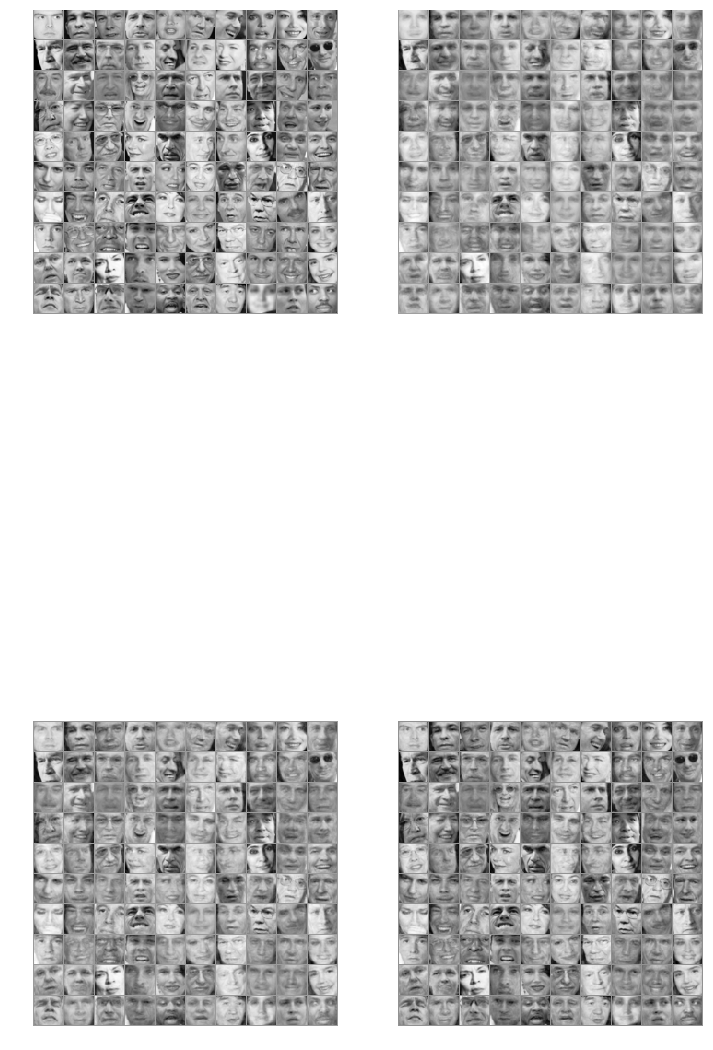

In [22]:
import numpy as np
from sklearn import decomposition
import matplotlib.pyplot as plt

def construct_image (x, size=10):
    side_pixel = size * 32 + size + 1
    img = np.zeros((side_pixel, side_pixel))
    for i in range(size * size):
        face = x[i].reshape(32, 32)
        s1 = 1 + (i // size) * 33
        s2 = 1 + (i % size) * 33
        for j1 in range(32):
            for j2 in range(32):
                img[s1+j2,s2+j1] = -face[j1,j2]
    
    return img

x = np.loadtxt('faces.csv', delimiter=',')

idx_start = 624
img = [0] * 4
img[0] = construct_image(x[idx_start:idx_start+100])

pca20 = decomposition.PCA(n_components = 20)
x1 = pca20.fit_transform(x[idx_start:idx_start+100,:])
x2 = pca20.inverse_transform(x1)
img[1] = construct_image(x2)

pca40 = decomposition.PCA(n_components = 40)
x1 = pca40.fit_transform(x[idx_start:idx_start+100,:])
x2 = pca40.inverse_transform(x1)
img[2] = construct_image(x2)

pca60 = decomposition.PCA(n_components = 60)
x1 = pca60.fit_transform(x[idx_start:idx_start+100,:])
x2 = pca60.inverse_transform(x1)
img[3] = construct_image(x2)

plt.figure(figsize=(12,24))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.axis('off')
    plt.imshow(img[i], cmap=plt.cm.Greys)

plt.show()

# faces KMeans

In [23]:
import numpy as np
from sklearn import decomposition, cluster
import matplotlib.pyplot as plt

def construct_image (x, size=10):
    side_pixel = size * 32 + size + 1
    img = np.zeros((side_pixel, side_pixel))
    for i in range(size * size):
        face = x[i].reshape(32, 32)
        s1 = 1 + (i // size) * 33
        s2 = 1 + (i % size) * 33
        for j1 in range(32):
            for j2 in range(32):
                img[s1+j2,s2+j1] = -face[j1,j2]
    
    return img

x = np.loadtxt('faces.csv', delimiter=',')

pca = decomposition.PCA(n_components = 60)
x1 = pca.fit_transform(x)

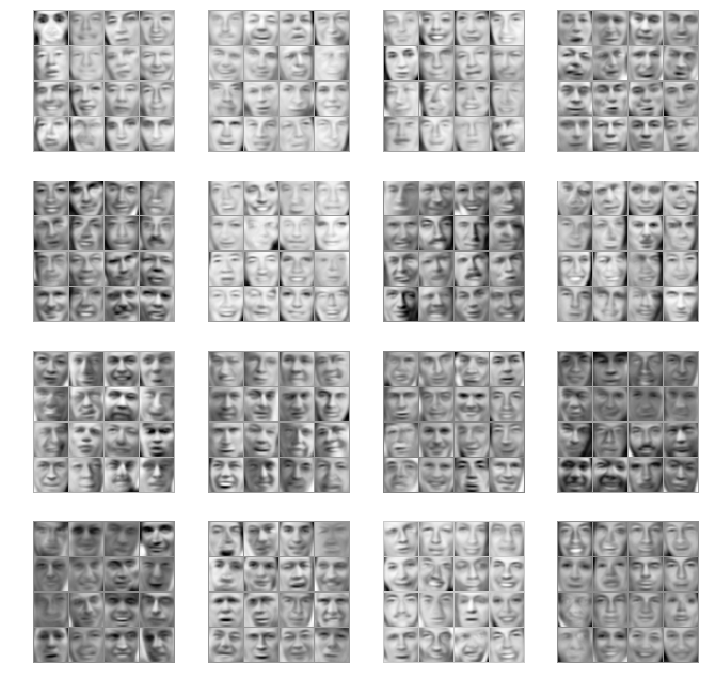

In [24]:
kmeans = cluster.KMeans(n_clusters=16, init='k-means++', random_state=2018)
kmeans.fit(x1)
label = kmeans.labels_

np.random.seed(2018)
img = [0] * 16
for i in range(16):
    idx = []
    for j in range(len(label)):
        if label[j] == i:
            idx.append(j)
    
    selection = np.random.choice(idx, 16, replace=False)
    x2 = []
    for j in selection:
        x2.append(x1[j])
    
    x3 = pca.inverse_transform(np.asarray(x2))
    img[i] = construct_image(x3, 4)

plt.figure(figsize=(12,12))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.axis('off')
    plt.imshow(img[i], cmap=plt.cm.Greys)

plt.show()

# faces EM

In [25]:
import numpy as np
from sklearn import decomposition, mixture
import matplotlib.pyplot as plt

def construct_image (x, size=10):
    side_pixel = size * 32 + size + 1
    img = np.zeros((side_pixel, side_pixel))
    for i in range(size * size):
        face = x[i].reshape(32, 32)
        s1 = 1 + (i // size) * 33
        s2 = 1 + (i % size) * 33
        for j1 in range(32):
            for j2 in range(32):
                img[s1+j2,s2+j1] = -face[j1,j2]
    
    return img

x = np.loadtxt('faces.csv', delimiter=',')

pca = decomposition.PCA(n_components = 60)
x1 = pca.fit_transform(x)

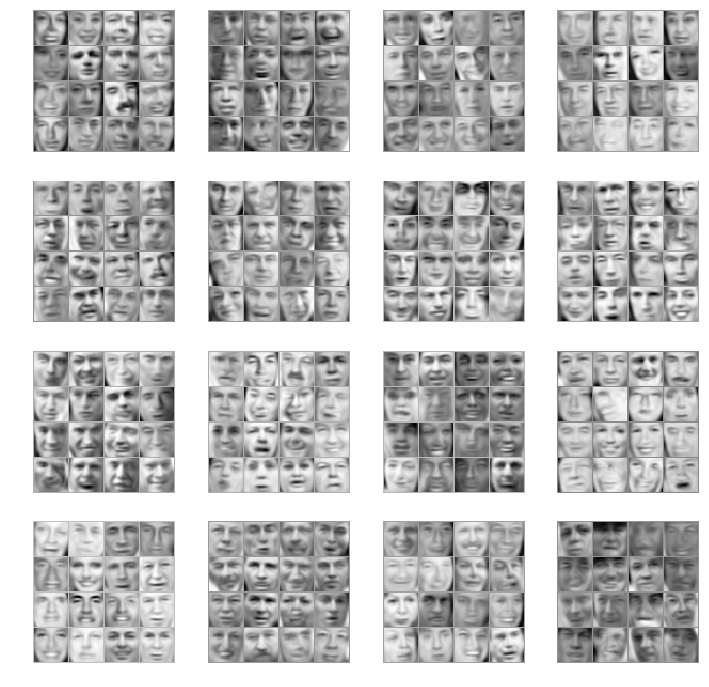

In [26]:
em = mixture.GaussianMixture(n_components=16, random_state=2018, covariance_type='full')
em.fit(x1)
label = em.predict(x1)

np.random.seed(2018)
img = [0] * 16
for i in range(16):
    idx = []
    for j in range(len(label)):
        if label[j] == i:
            idx.append(j)
    
    selection = np.random.choice(idx, 16, replace=False)
    x2 = []
    for j in selection:
        x2.append(x1[j])
    
    x3 = pca.inverse_transform(np.asarray(x2))
    img[i] = construct_image(x3, size=4)

plt.figure(figsize=(12,12))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.axis('off')
    plt.imshow(img[i], cmap=plt.cm.Greys)

plt.show()

# Spectral Clustering

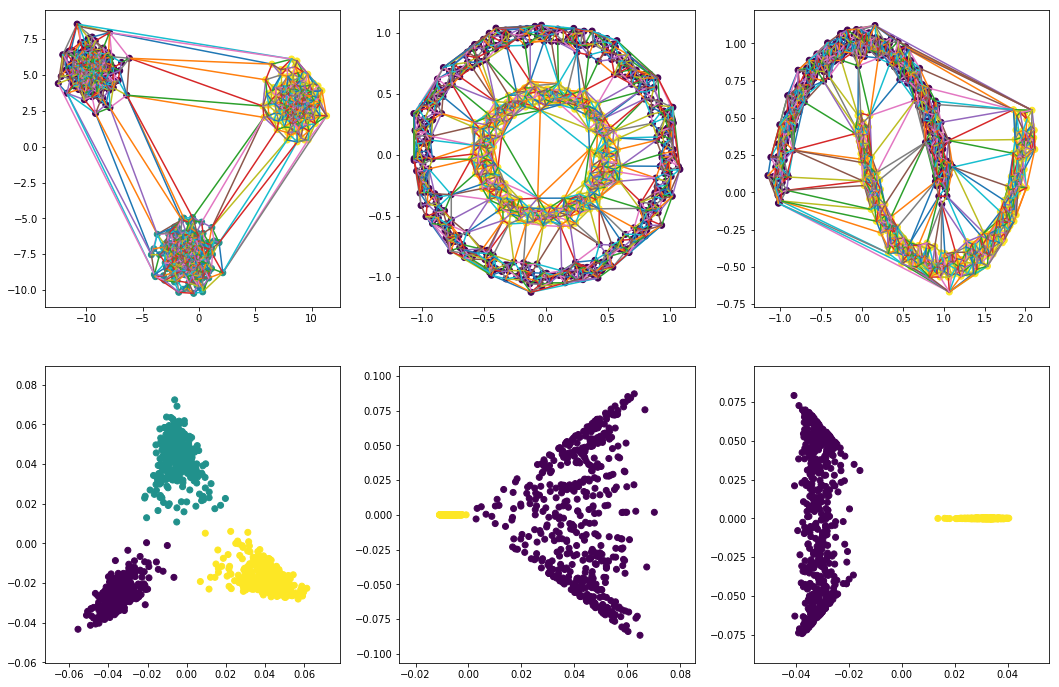

In [27]:
import numpy as np
import scipy as sp
from sklearn import datasets
import matplotlib.pyplot as plt

data = []
n_point = 1000
data.append(datasets.make_blobs(n_samples = n_point, centers = 3, random_state = 2017))
data.append(datasets.make_circles(n_samples = n_point, factor = 0.5, noise = 0.05, random_state = 2017))
data.append(datasets.make_moons(n_samples = n_point, noise = 0.05, random_state = 2017))
gamma = [0.001, 500, 100]

plt.figure(figsize = (18, 12))
eig_sorted = []
for k in range(3):
    vor = sp.spatial.Voronoi(data[k][0])
    plt.subplot(2, 3, k + 1)
    plt.scatter(data[k][0][:,0], data[k][0][:,1], c=data[k][1])
    for i in vor.ridge_points:
        plt.plot([data[k][0][i[0], 0], data[k][0][i[1], 0]], [data[k][0][i[0], 1], data[k][0][i[1], 1]])
    a = np.zeros((n_point, n_point))
    for i in vor.ridge_points:
        a[i[0],i[1]] = a[i[1],i[0]] = np.exp(-gamma[k] * sum((data[k][0][i[0]] - data[k][0][i[1]]) ** 2))
    a_sqrt = np.sqrt(a.sum(axis = 1))
    for i in range(n_point):
        a[i,i] = 1
        for j in range(i+1, n_point):
            a[i,j] = a[j,i] = - a[i,j] / a_sqrt[i] / a_sqrt[j]
    a_eig = np.linalg.eig(a)
    idx = a_eig[0].argsort()
    a_eig_sorted = (a_eig[0][idx], a_eig[1][:,idx])
    eig_sorted.append(a_eig_sorted)
    plt.subplot(2, 3, k + 4)
    plt.scatter(a_eig_sorted[1][:,1], a_eig_sorted[1][:,2], c=data[k][1])

plt.show()

# iris EM (diagonal) -- AIC & BIC

C:\Users\bingt\Anaconda3\lib\site-packages\sklearn\mixture\base.py:237: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


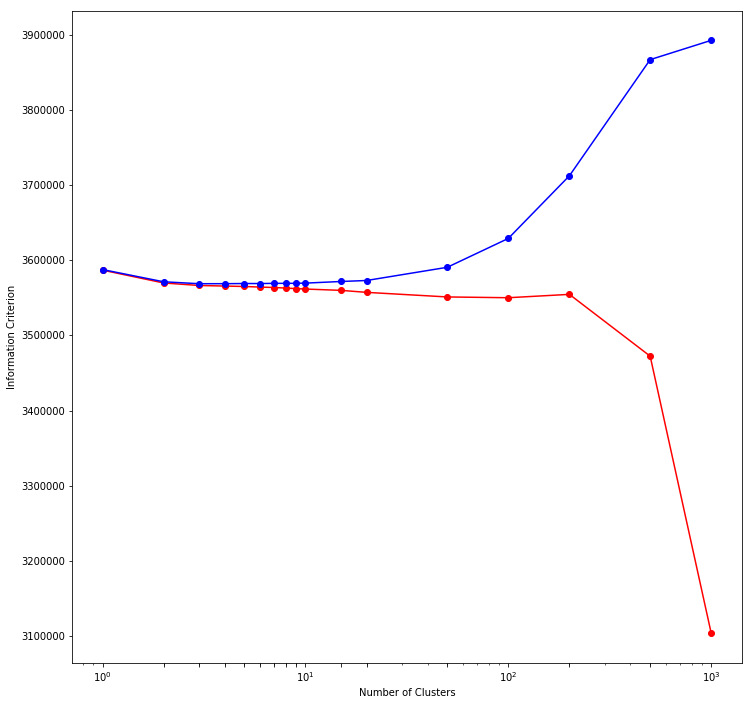

In [28]:
n_components=[1,2,3,4,5,6,7,8,9,10,15,20,50,100,200,500,1000]

score_aic = []
score_bic = []
for i in range(len(n_components)):
    em = mixture.GaussianMixture(n_components=n_components[i], random_state=2018, covariance_type='diag')
    em.fit(x1)
    score_aic.append(em.aic(x1))
    score_bic.append(em.bic(x1))

plt.figure(figsize=(12,12))
plt.xscale('log')
plt.xticks(n_components)
plt.xlabel('Number of Clusters')
plt.ylabel('Information Criterion')
plt.plot(n_components, score_aic, 'ro-', label='AIC')
plt.plot(n_components, score_bic, 'bo-', label='BIC')
plt.show()

# iris EM (full) -- AIC & BIC

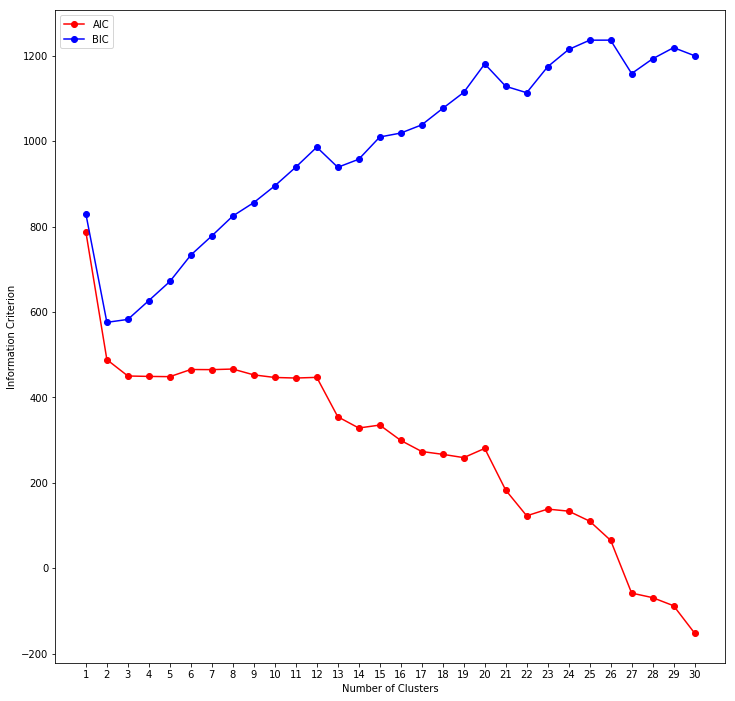

In [29]:
import numpy as np
from sklearn import datasets, decomposition, mixture
import matplotlib.pyplot as plt

iris = datasets.load_iris()
x = iris.data

score_aic = []
score_bic = []
for i in range(1, 31):
    em = mixture.GaussianMixture(n_components=i, random_state=2018, covariance_type='full')
    em.fit(x)
    score_aic.append(em.aic(x))
    score_bic.append(em.bic(x))

plt.figure(figsize=(12,12))
plt.xlabel('Number of Clusters')
plt.xticks(np.arange(1,31))
plt.ylabel('Information Criterion')
plt.plot(np.arange(1,31), score_aic, 'ro-', label='AIC')
plt.plot(np.arange(1,31), score_bic, 'bo-', label='BIC')
plt.legend()
plt.show()